<a href="https://colab.research.google.com/github/kamal01singh/Covid-Vaccination-Analysis/blob/main/Covid_vaccination_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
covid_df = pd.read_csv('/content/covid_19_india.csv')

In [ ]:
covid_df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [ ]:

covid_df['State/UnionTerritory'].nunique()

46

In [ ]:
covid_df.drop(['Time','Sno','ConfirmedIndianNational','ConfirmedForeignNational'],inplace =True, axis = 1)
covid_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [ ]:
covid_df['ActiveCases'] = covid_df['Confirmed'] - (covid_df['Cured'] - covid_df['Deaths'])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
18105,2021-08-11,Telangana,638410,3831,650353,15774
18106,2021-08-11,Tripura,77811,773,80660,3622
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095
18109,2021-08-11,West Bengal,1506532,18252,1534999,46719


In [ ]:
covid_df.describe()

,Cured,Deaths,Confirmed,ActiveCases
count,1.811000e+04,18110.000000,1.811000e+04,18110.000000
mean,2.786375e+05,4052.402264,3.010314e+05,26446.286030
std,6.148909e+05,10919.076411,6.561489e+05,66894.070091
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.360250e+03,32.000000,4.376750e+03,583.000000
50%,3.336400e+04,588.000000,3.977350e+04,4954.500000
75%,2.788698e+05,3643.750000,3.001498e+05,22964.250000
max,6.159676e+06,134201.000000,6.363442e+06,829727.000000


Text(0, 0.5, 'Active Cases')

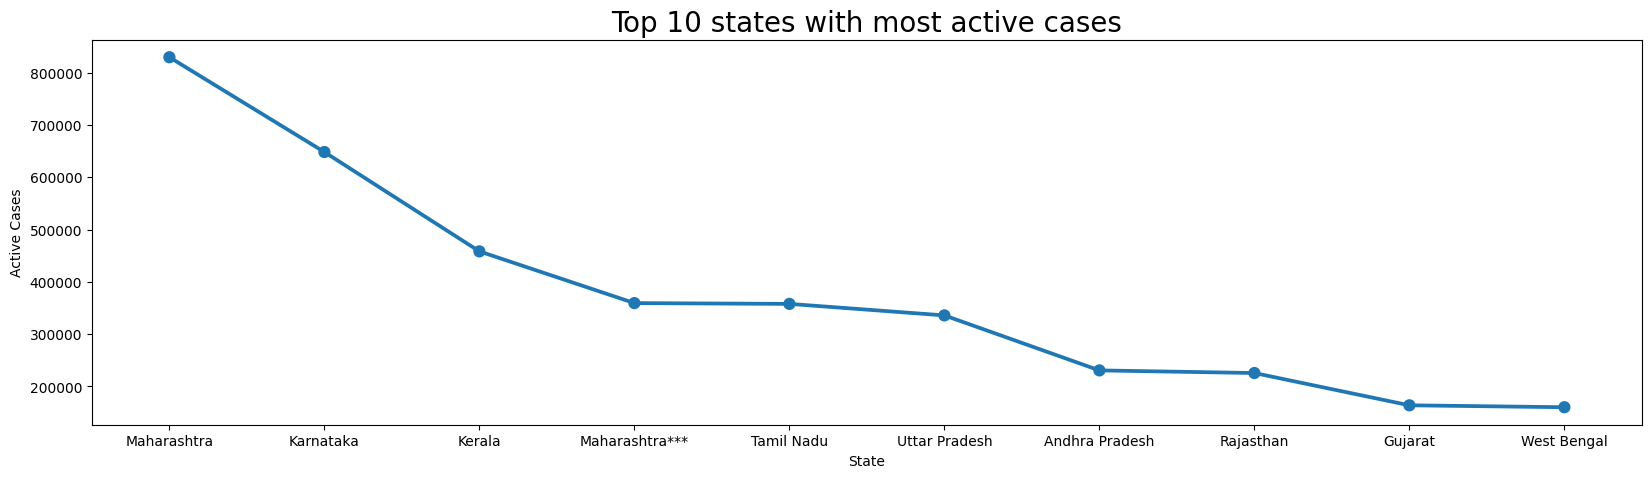

In [ ]:
top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['ActiveCases' , 'Date']].sort_values(by='ActiveCases',ascending = False).reset_index()
fig = plt.figure(figsize=(20,5))
plot =sns.pointplot(data = top_10_active_cases.iloc[:10], y='ActiveCases', x='State/UnionTerritory')
plt.title('Top 10 states with most active cases',size=20)
plt.xlabel('State')
plt.ylabel('Active Cases')

In [ ]:
covid_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353,15774
18106,2021-08-11,Tripura,77811,773,80660,3622
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095


Text(0, 0.5, 'Deaths')

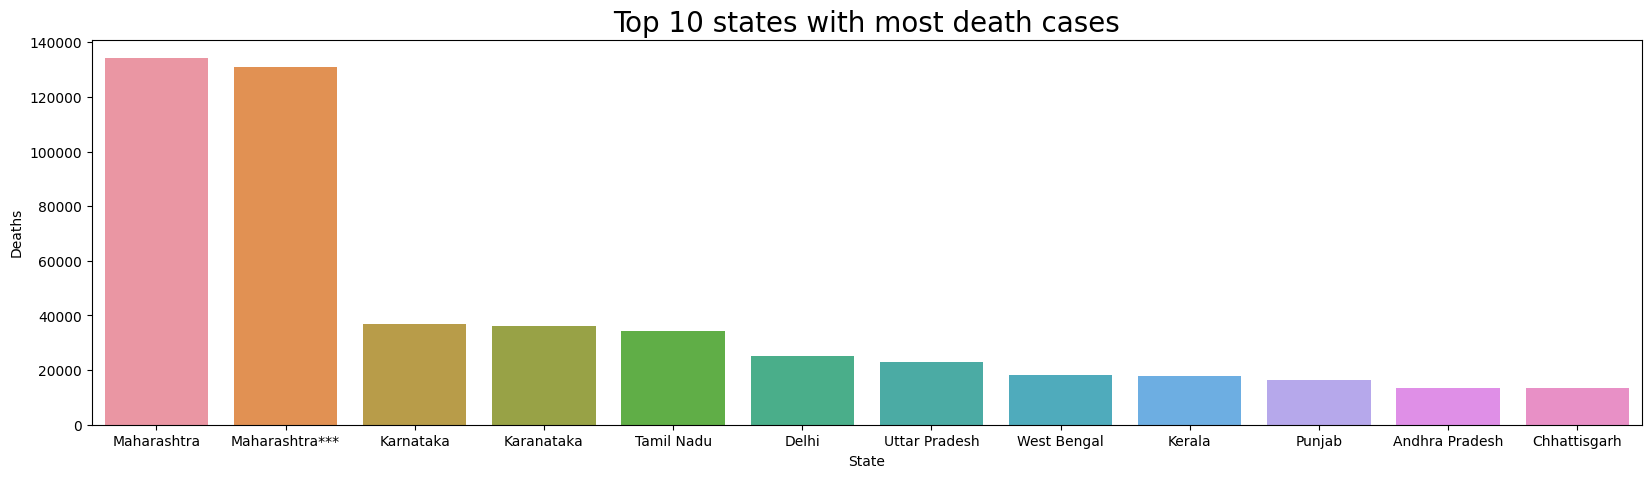

In [ ]:
top_10_death_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths' , 'Date']].sort_values(by='Deaths',ascending = False).reset_index()
fig = plt.figure(figsize=(20,5))
plot = sns.barplot(data = top_10_death_cases.iloc[:12], y='Deaths', x='State/UnionTerritory')
plt.title('Top 10 states with most death cases',size=20)
plt.xlabel('State')
plt.ylabel('Deaths')


Text(0.5, 1.0, 'Top 5 Affected States in India')

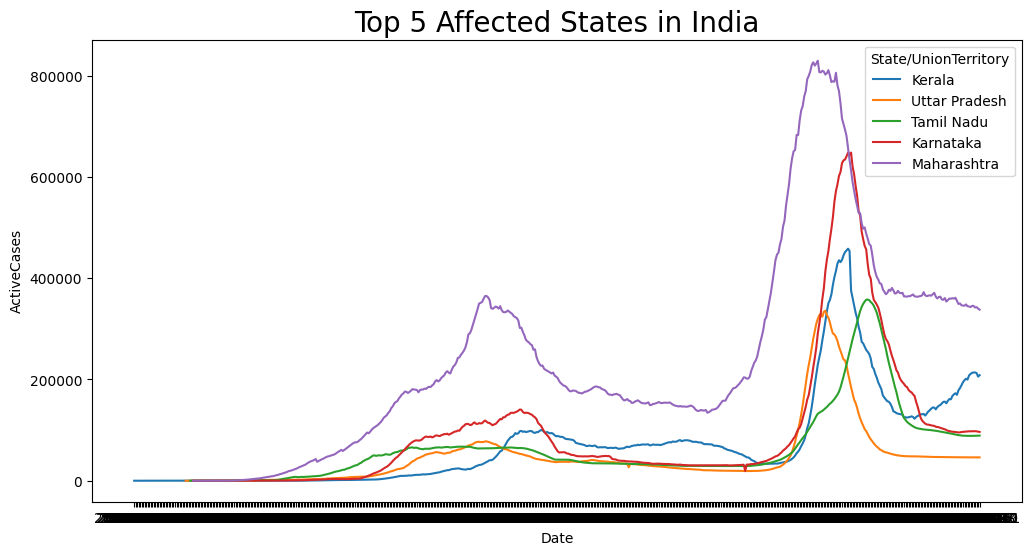

In [ ]:
fig = plt.figure(figsize=(12,6))
plot = sns.lineplot(data = covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])],x='Date',y='ActiveCases',hue = 'State/UnionTerritory')
plot.set_title("Top 5 Affected States in India",size=20)


In [ ]:
statewise = pd.pivot_table(covid_df , values=['Cured','Deaths','Confirmed'],index = 'State/UnionTerritory',aggfunc='max')


In [ ]:
statewise['Recovery Rate'] = statewise['Cured']*100 /  statewise['Confirmed']
statewise['Death Rate'] = statewise['Deaths']*100 /  statewise['Confirmed']
statewise

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971
Bihar****,715730,701234,9452,97.974655,1.320610
Cases being reassigned to states,9265,0,0,0.000000,0.000000
Chandigarh,61992,61150,811,98.641760,1.308233
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


In [ ]:
vaccine_df = pd.read_csv('/content/covid_vaccine_statewise.csv.xls')
vaccine_df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_large=covid_df.nlargest(15,['ActiveCases'])

df_large=covid_df.groupby(['State/UnionTerritory'])['ActiveCases'].max().sort_values(ascending=False).reset_index()
df_l=df_large.nlargest(15, ['ActiveCases'])
df_l

,State/UnionTerritory,ActiveCases
0,Maharashtra,829727
1,Karnataka,648383
2,Kerala,458370
3,Maharashtra***,359438
4,Tamil Nadu,357936
5,Uttar Pradesh,335923
6,Andhra Pradesh,230727
7,Rajasthan,225697
8,Gujarat,163948
9,West Bengal,160289


Text(0.5, 1.0, 'Top 15 Active cases')

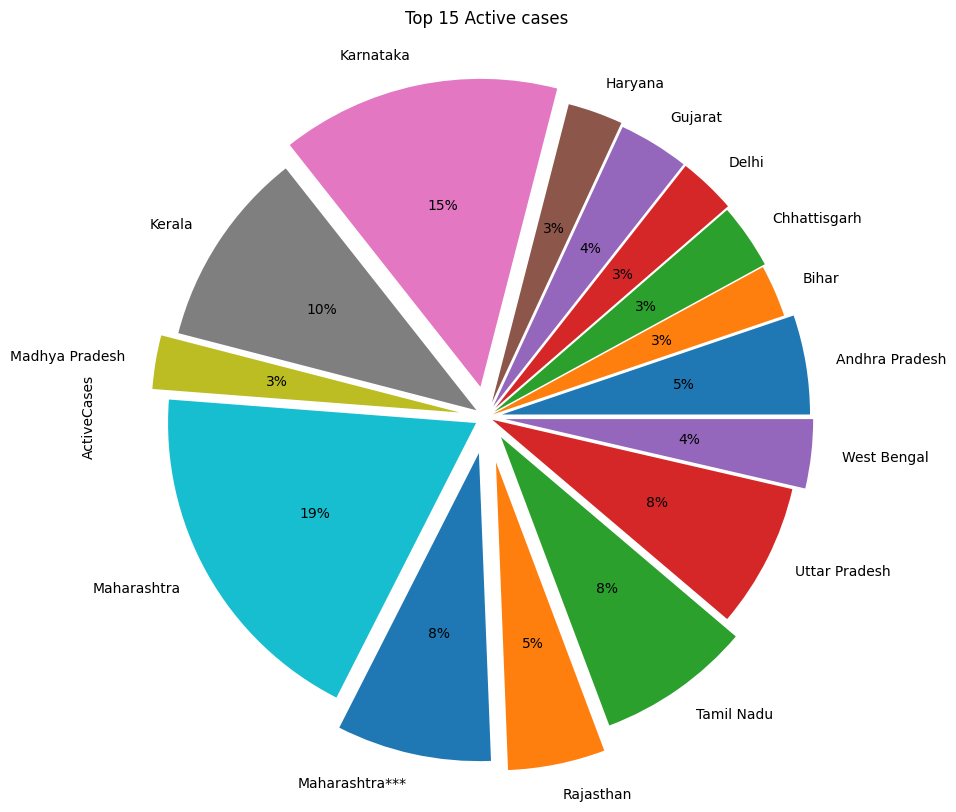

In [ ]:
fig = plt.figure(figsize=(20,10))
df_l.groupby(["State/UnionTerritory"]).sum()["ActiveCases"].plot(kind='pie',rot=90,explode=(0.05,0.02,0.03,0.04,0.04,0.05,0.1,0.04,0.09,0.04,0.12,0.15,0.08,0.02,0.06),autopct='%1.0f%%')
plt.title("Top 15 Active cases")
